In [1]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
#Load the data set

colors=pd.read_csv("color.csv")
colors.head()

,colors,red,green,blue
0,Blue,20,139,240
1,Brown,174,83,72
2,Green,144,249,131
3,Pink,168,25,156
4,Green,30,182,136


In [3]:
colors.shape

(5052, 4)

In [4]:
colors.columns

Index(['colors', 'red', 'green', 'blue'], dtype='object')

In [5]:
#Convert Categorical Data into Numerical

from sklearn.preprocessing import LabelEncoder
colors["colors"]=LabelEncoder().fit_transform(colors["colors"])
colors.head()

,colors,red,green,blue
0,1,20,139,240
1,2,174,83,72
2,3,144,249,131
3,6,168,25,156
4,3,30,182,136


<Axes: >

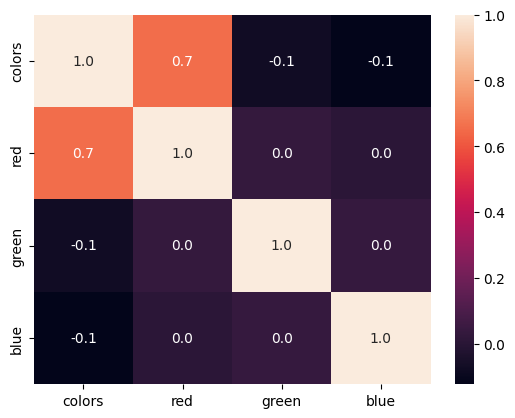

In [6]:
#Check features correlation

sns.heatmap(colors.corr(),annot=True,fmt='0.1f')

In [7]:
#Extraction of features(x) and labels(y) from the data set

x=colors.iloc[:, 1:]
y=colors.iloc[:, :-3]

In [8]:
x

,red,green,blue
0,20,139,240
1,174,83,72
2,144,249,131
3,168,25,156
4,30,182,136
...,...,...,...
5047,26,26,26
5048,27,27,27
5049,28,28,28
5050,29,29,29


In [9]:
y

,colors
0,1
1,2
2,3
3,6
4,3
...,...
5047,0
5048,0
5049,0
5050,0


In [10]:
#Split the data into train and test

from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
#Check the accuracy of the trained model

#KNN model
knn = KNeighborsClassifier()
knn.fit(x1, y1)
yp=knn.predict(x2)
knn_accuracy=accuracy_score(yp,y2)*100
print(f"KNN accuracy :{knn_accuracy:.2f}%")

#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x1, y1)
yp_rf = rf.predict(x2)
rf_accuracy = accuracy_score(yp_rf, y2) * 100
print(f"Random Forest accuracy: {rf_accuracy:.2f}%")

#Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x1, y1)
yp_dt = dt.predict(x2)
dt_accuracy = accuracy_score(yp_dt, y2) * 100
print(f"Decision Tree accuracy: {dt_accuracy:.2f}%")

#SVC
svc = SVC()
svc.fit(x1, y1)
yp_svc = svc.predict(x2)
svc_accuracy = accuracy_score(yp_svc, y2) * 100
print(f"SVC accuracy: {svc_accuracy:.2f}%")

C:\Users\lalan\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lalan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KNN accuracy :86.15%
Random Forest accuracy: 86.35%
Decision Tree accuracy: 82.20%


C:\Users\lalan\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC accuracy: 87.34%
